# Case Study on Effect of Lot Size on Sale Price in King County 

# Importing modules

In [4]:
import csv
import numpy as np
import pandas as pd
from collections import defaultdict
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [5]:
sale = pd.read_csv('data/EXTR_RPSale.csv')
sale.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [6]:
parcel = pd.read_csv('data/EXTR_Parcel.csv', encoding='latin-1')
parcel.head()

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,259750,840,,FOREST RIDGE ADD,22,4,5,21,29,NE,...,N,N,N,N,N,N,N,N,N,N
1,221221,480,,EASTRIDGE DIV NO. 02,48 & 49,,5,22,17,NE,...,N,N,N,N,N,N,N,N,N,N
2,57900,1110,,BAY VIEW ADD TO SALMON BAY,11-12-13,9,3,26,35,NE,...,N,N,N,N,N,N,N,N,N,N
3,611540,83,,NORMANDY PARK FIVE-ACRE TRS,POR 4,,4,22,6,NE,...,N,N,N,N,N,N,N,N,N,N
4,605611,800,,NEW RAINIER VISTA II,1D,40,4,24,16,SE,...,N,N,N,N,N,N,N,N,N,N


In [7]:
res_bldg = pd.read_csv('data/EXTR_ResBldg.csv')
res_bldg.head()    

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,10455,780,1,1,32708 19TH PL SW 98023,32708,,,19TH,PL,...,1,0,0,1989,0,0,0,0,3,0
1,10455,810,1,1,32616 19TH PL SW 98023,32616,,,19TH,PL,...,1,0,0,1989,0,0,0,0,4,0
2,10455,860,1,1,32619 18TH PL SW 98023,32619,,,18TH,PL,...,1,0,0,1989,0,0,0,0,3,0
3,10456,410,1,1,32603 20TH AVE SW 98023,32603,,,20TH,AVE,...,0,0,0,1990,0,0,0,0,3,0
4,10457,810,1,1,33010 20TH AVE SW 98023,33010,,,20TH,AVE,...,1,0,0,1992,0,0,0,0,3,0


# Combining Major and Minor to get PIN, the unique identifier

In [8]:
'''
PIN is the unique identifier, which combines the major and minor fields. Major should be 6 digits, minor should be 4
digits long. Add leading zeros if they are not the specified length.
'''
sale['Major'] = sale['Major'].apply(lambda x: str(x).zfill(6))
sale['Minor'] = sale['Minor'].apply(lambda x: str(x).zfill(4))
sale.head()      

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,0110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,0040,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,0050,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,0715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,0900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [9]:
parcel['Major'] = parcel['Major'].apply(lambda x: str(x).zfill(6))
parcel['Minor'] = parcel['Minor'].apply(lambda x: str(x).zfill(4))
parcel.head() 

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,259750,0840,,FOREST RIDGE ADD,22,4,5,21,29,NE,...,N,N,N,N,N,N,N,N,N,N
1,221221,0480,,EASTRIDGE DIV NO. 02,48 & 49,,5,22,17,NE,...,N,N,N,N,N,N,N,N,N,N
2,057900,1110,,BAY VIEW ADD TO SALMON BAY,11-12-13,9,3,26,35,NE,...,N,N,N,N,N,N,N,N,N,N
3,611540,0083,,NORMANDY PARK FIVE-ACRE TRS,POR 4,,4,22,6,NE,...,N,N,N,N,N,N,N,N,N,N
4,605611,0800,,NEW RAINIER VISTA II,1D,40,4,24,16,SE,...,N,N,N,N,N,N,N,N,N,N


In [10]:
res_bldg['Major'] = res_bldg['Major'].apply(lambda x: str(x).zfill(6))
res_bldg['Minor'] = res_bldg['Minor'].apply(lambda x: str(x).zfill(4))
res_bldg.head() 

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,010455,0780,1,1,32708 19TH PL SW 98023,32708,,,19TH,PL,...,1,0,0,1989,0,0,0,0,3,0
1,010455,0810,1,1,32616 19TH PL SW 98023,32616,,,19TH,PL,...,1,0,0,1989,0,0,0,0,4,0
2,010455,0860,1,1,32619 18TH PL SW 98023,32619,,,18TH,PL,...,1,0,0,1989,0,0,0,0,3,0
3,010456,0410,1,1,32603 20TH AVE SW 98023,32603,,,20TH,AVE,...,0,0,0,1990,0,0,0,0,3,0
4,010457,0810,1,1,33010 20TH AVE SW 98023,33010,,,20TH,AVE,...,1,0,0,1992,0,0,0,0,3,0


In [11]:
sale['PIN'] = sale['Major'] + sale['Minor']
parcel['PIN'] = parcel['Major'] + parcel['Minor']
res_bldg['PIN'] = res_bldg['Major'] + res_bldg['Minor']

In [12]:
sale.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,2687551,138860,0110,08/21/2014,245000,20140828001436,,,,,...,6,3,N,N,N,N,1,8,,1388600110
1,1235111,664885,0040,07/09/1991,0,199203161090,071,001,664885,C,...,0,26,N,N,N,N,18,3,11,6648850040
2,2704079,423943,0050,10/11/2014,0,20141205000558,,,,,...,6,15,N,N,N,N,18,8,18 31 51,4239430050
3,2584094,403700,0715,01/04/2013,0,20130110000910,,,,,...,6,15,N,N,N,N,11,8,18 31 38,4037000715
4,1056831,951120,0900,04/20/1989,85000,198904260448,117,053,951120,P,...,0,2,N,N,N,N,1,9,49,9511200900


# Merging the sale, parcel and res_bldg dataframes on PIN column

In [13]:
df1 = sale.merge(parcel, left_on='PIN', right_on='PIN', how='inner')
df1.head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,2687551,138860,0110,08/21/2014,245000,20140828001436,,,,,...,N,N,N,N,N,N,N,N,N,N
1,1066933,138860,0110,06/12/1989,109300,198906191556,144,021,138860,P,...,N,N,N,N,N,N,N,N,N,N
2,2102034,138860,0110,01/16/2005,14684,20050216001248,,,,,...,N,N,N,N,N,N,N,N,N,N
3,2131568,138860,0110,06/08/2005,0,20050617000041,,,,,...,N,N,N,N,N,N,N,N,N,N
4,2704079,423943,0050,10/11/2014,0,20141205000558,,,,,...,N,N,N,N,N,N,N,N,N,N


In [14]:
# Full merged database
df2 = df1.merge(res_bldg, left_on='PIN', right_on='PIN', how='inner')
df2.head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2687551,138860,0110,08/21/2014,245000,20140828001436,,,,,...,0,0,0,1989,0,0,0,0,3,0
1,1066933,138860,0110,06/12/1989,109300,198906191556,144,021,138860,P,...,0,0,0,1989,0,0,0,0,3,0
2,2102034,138860,0110,01/16/2005,14684,20050216001248,,,,,...,0,0,0,1989,0,0,0,0,3,0
3,2131568,138860,0110,06/08/2005,0,20050617000041,,,,,...,0,0,0,1989,0,0,0,0,3,0
4,2704079,423943,0050,10/11/2014,0,20141205000558,,,,,...,0,0,0,1969,0,0,0,0,4,0


# Cleaning Data

In [15]:
# Extracting relevant columns of PIN, DocumentDate, SalePrice, LotSquareFootage, Zip code
# DocumentDate is assumed to be the same as SaleDate
columns = ['PIN', 'YrBuilt', 'DocumentDate', 'SalePrice', 'SqFtLot', 'ZipCode']
df = df2[columns]
df.head()

,PIN,YrBuilt,DocumentDate,SalePrice,SqFtLot,ZipCode
0,1388600110,1989,08/21/2014,245000,7929,98002
1,1388600110,1989,06/12/1989,109300,7929,98002
2,1388600110,1989,01/16/2005,14684,7929,98002
3,1388600110,1989,06/08/2005,0,7929,98002
4,4239430050,1969,10/11/2014,0,3600,98092


In [16]:
cleaned_zeros_df = df[df['SalePrice'] > 1].reset_index(drop=True)
cleaned_zeros_df.head()

,PIN,YrBuilt,DocumentDate,SalePrice,SqFtLot,ZipCode
0,1388600110,1989,08/21/2014,245000,7929,98002
1,1388600110,1989,06/12/1989,109300,7929,98002
2,1388600110,1989,01/16/2005,14684,7929,98002
3,4239430050,1969,07/15/1999,96000,3600,98092
4,4239430050,1969,01/08/2001,127500,3600,98092


In [17]:
cleaned_duplicates_df = cleaned_zeros_df.drop_duplicates()
cleaned_duplicates_df.head()

,PIN,YrBuilt,DocumentDate,SalePrice,SqFtLot,ZipCode
0,1388600110,1989,08/21/2014,245000,7929,98002
1,1388600110,1989,06/12/1989,109300,7929,98002
2,1388600110,1989,01/16/2005,14684,7929,98002
3,4239430050,1969,07/15/1999,96000,3600,98092
4,4239430050,1969,01/08/2001,127500,3600,98092


In [19]:
cleaned_NA_df = cleaned_duplicates_df.dropna()
cleaned_NA_df.head()

,PIN,YrBuilt,DocumentDate,SalePrice,SqFtLot,ZipCode
0,1388600110,1989,08/21/2014,245000,7929,98002
1,1388600110,1989,06/12/1989,109300,7929,98002
2,1388600110,1989,01/16/2005,14684,7929,98002
3,4239430050,1969,07/15/1999,96000,3600,98092
4,4239430050,1969,01/08/2001,127500,3600,98092


In [70]:
cleaned_NA_df.shape

(842281, 6)

In [71]:
# Dropping years below the mean 1968
f_df = cleaned_NA_df.copy()
f_df = f_df[f_df['YrBuilt'] > f_df['YrBuilt'].mean()]

In [72]:
# Normalizing SalePrice and SqFtLot
f_df.SalePrice = (f_df.SalePrice - f_df.SalePrice.mean()) / (f_df.SalePrice.std())
f_df.SqFtLot = (f_df.SqFtLot - f_df.SqFtLot.mean()) / (f_df.SqFtLot.std())
f_df = f_df[(f_df['SalePrice'] <= 3) & (f_df['SalePrice'] >= -3)]
f_df = f_df[(f_df['SqFtLot'] <= 3) & (f_df['SqFtLot'] >= -3)]
#standardized_sale_price = final_df[(final_df.SalePrice-final_df.SalePrice.mean())/ (final_df.SalePrice.max() - final_df.SalePrice.min())]
f_df.head()

,PIN,YrBuilt,DocumentDate,SalePrice,SqFtLot,ZipCode
0,1388600110,1989,08/21/2014,-0.231458,-0.219145,98002
1,1388600110,1989,06/12/1989,-0.347946,-0.219145,98002
2,1388600110,1989,01/16/2005,-0.429167,-0.219145,98002
11,3303951610,1994,06/07/2012,-0.154201,-0.213417,98038
12,3303951610,1994,08/26/2013,-0.124242,-0.213417,98038


In [45]:
f_df.describe()

,YrBuilt,SalePrice,SqFtLot
count,429828.000000,429828.000000,429828.000000
mean,1991.221721,-0.090938,-0.110838
std,11.007335,0.357286,0.348983
min,1970.000000,-0.441770,-0.344036
25%,1982.000000,-0.282964,-0.249045
50%,1991.000000,-0.185104,-0.213115
75%,2000.000000,-0.034022,-0.144312
max,2018.000000,2.991914,2.999828


# Plotting

Text(0,0.5,'Normalized Sale Price')

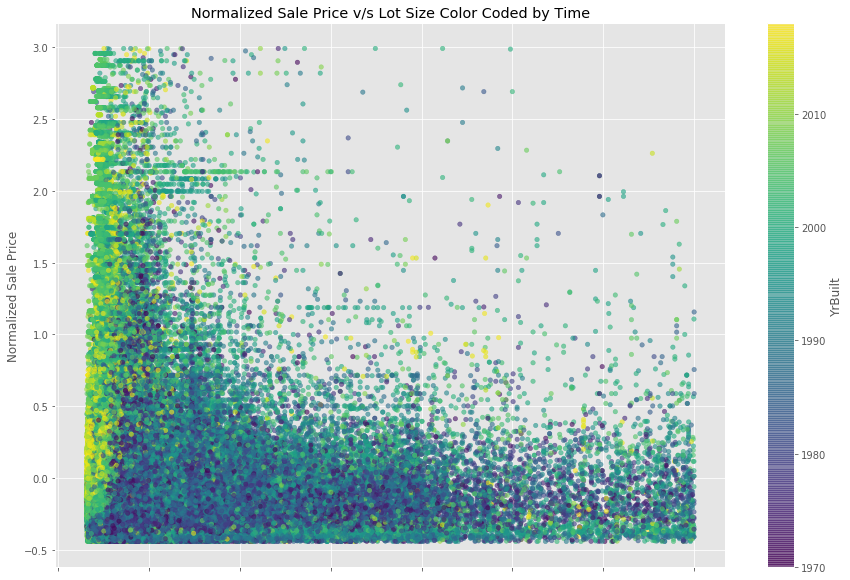

In [62]:
ax = f_df.plot(kind='scatter', x='SqFtLot', y='SalePrice', c="YrBuilt",cmap='viridis', figsize=(15,10), alpha=0.6)
ax.set_title('Normalized Sale Price v/s Lot Size Color Coded by Time')
ax.set_xlabel('Normalized Lot Size(sq. ft.)')
ax.set_ylabel('Normalized Sale Price')

# Conclusion:
* Data cleaning for the sale prices and lot sizes should exclude the outliers. 
* The lot sizes got significantly smaller in the recent years
* The Sale prices for residential properties with way smaller lot sizes were very high in the recent years as compared   to the larger lot sizes in years prior to 2000s. 
* Non-linear decreasing relationship between sale prices and lot sizes. This is unexpected since we would expect   higher prices for larger lot sizes.
